In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from random import shuffle
import imageio

In [2]:
import tensorflow as tf

In [3]:
%matplotlib inline

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

Using TensorFlow backend.


In [5]:
from keras.models import model_from_json

In [6]:
counting_dict = {'forward': 0, 'reverse': 0, 'left': 0, 'right': 0, 'idle':0}
naming_dict = {'forward': 0, 'reverse': 0, 'left': 0, 'right': 0, 'idle':0}
IMG_SIZE = 75

In [7]:
def label_img(name):
    word_label = name.split('-')[0]
    if word_label == 'forward': return np.array([1,0,0,0, 0])
    elif word_label == 'reverse' : return np.array([0,1,0,0, 0])
    elif word_label == 'left' : return np.array([0,0,1,0, 0])
    elif word_label == 'right' : return np.array([0,0,0,1, 0])
    elif word_label == 'idle' : return np.array([0,0,0,0, 1])

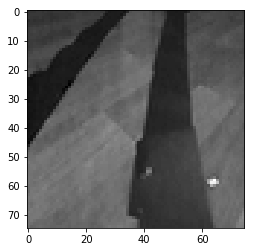

In [8]:
# Test on Test Set
TEST_DIR = './test'
def load_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        label = label_img(img)
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data


test_data = load_test_data()    
plt.imshow(test_data[10][0], cmap = 'gist_gray')

In [11]:
testImages = np.array([i[0] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data])


In [9]:
def get_label_from_result(result):
    label=''
    if(np.argmax(result) ==0):
        label='forward'
    elif(np.argmax(result)==1):
        label='reverse'
    elif(np.argmax(result)==2):
        label='left'
    elif(np.argmax(result)==3):
        label='right'
    elif(np.argmax(result)==4):
        label='idle'
    return label

In [12]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
loss, acc = loaded_model.evaluate(testImages, testLabels, verbose = 0)
print(acc * 100)
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
95.00000293438251


In [14]:
i = 0
for img in testImages:
    #print(img.shape)
    result = loaded_model.predict(img.reshape(-1,75,75,1))
    #print(result)
    #print(np.argmax(result))
    print('Predicted: ' + get_label_from_result(result) + ', Actual: ' + get_label_from_result(testLabels[i]))
    i = i +1

Predicted: left, Actual: left
Predicted: forward, Actual: forward
Predicted: right, Actual: left
Predicted: idle, Actual: idle
Predicted: forward, Actual: forward
Predicted: idle, Actual: idle
Predicted: forward, Actual: left
Predicted: idle, Actual: idle
Predicted: forward, Actual: forward
Predicted: forward, Actual: forward
Predicted: forward, Actual: left
Predicted: forward, Actual: right
Predicted: idle, Actual: idle
Predicted: forward, Actual: forward
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: idle, Actual: idle
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: idle, Actual: forward
Predicted: left, Actual: left
Predicted: forward, Actual: forward
Predicted: right, Actual: right
Predicted: forward, Actual: left
Predicted: idle, Actual: idle
Predicted: idle, Actual: idle
Predicted: left, Actual: left
Predicted: right, Actual: left
Predicted: forward, Actual: forward
Predicted: left, Actual: left
Predicted: right, Actu